## Using Freesound client

Unfortunately there's no pip package for freesound.
You need to clone [the package](https://github.com/MTG/freesound-python) and install it yourself.

To use Freesound place your `client_id` and `api_key` in `.freesound_api.json` file, or paste them two cells below.

In [1]:
import freesound
import json
import urllib.request

from IPython.display import Audio

In [2]:
MY_CREDENTIALS = json.loads(open('.freesound_api.json').read())

In [3]:
freesound_client = freesound.FreesoundClient()
freesound_client.set_token(MY_CREDENTIALS['api_key'])

OAUTH_HTTP_URL = 'https://freesound.org/apiv2/oauth2/authorize/?client_id={}&response_type=code'.format(MY_CREDENTIALS['client_id'])
urllib.request.urlopen(OAUTH_HTTP_URL)

In [4]:
results = list(
  freesound_client.text_search(
    query="dub",
    fields='id,name,previews')
)

### Write sound's preview to disk

In [5]:
result = results[1]
result

<Sound: id="201958", name="Dub (138 BPM-FIVE23_80113)">

In [6]:
preview_file_path, __ = result.retrieve_preview(directory='/tmp')

In [7]:
Audio(filename=preview_file_path)

## Utils for signals

In [8]:
import numpy as np

from scipy.signal import spectrogram
from scipy.io import wavfile

from pydub import AudioSegment


import matplotlib.pyplot as plt
%matplotlib inline 

def to_decibels(x):
  return 10 * np.log10(x)

### Reading wave 

In [9]:
audio_segment = AudioSegment.from_mp3(preview_file_path)
audio_segment.export('/tmp/example_wave.wav', format='wav')

fs, wave = wavfile.read('/tmp/example_wave.wav')

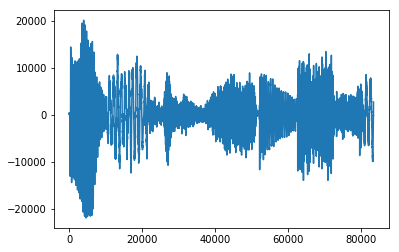

In [10]:
plt.plot(wave[:, 0])

### Print spectrogram for each channel

Channel 0


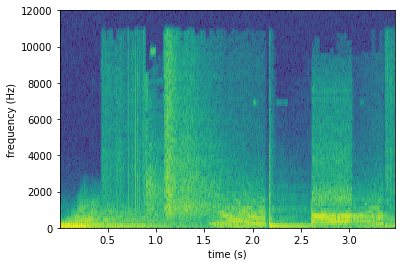

Channel 1


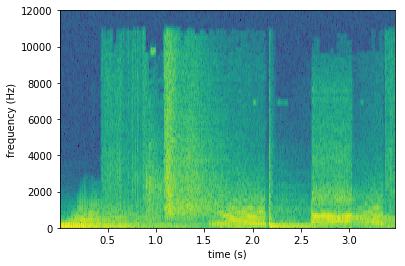

In [11]:
for channel in range(wave.shape[1]):
  print('Channel', channel)
  
  f, t, spectrum = spectrogram(wave[:, channel], fs=fs, window='blackman')

  plt.pcolormesh(t, f, to_decibels(spectrum))
  plt.xlabel('time (s)')
  plt.ylabel('frequency (Hz)')
  plt.show()